In [4]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection  import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [7]:
data=pd.read_csv('energydata_complete.csv')
data.head()

,recorded_timestamp,total_energy_use,lighting_energy_use,temp_sensor_1,humidity_sensor_1,temp_sensor_2,humidity_sensor_2,temp_sensor_3,humidity_sensor_3,temp_sensor_4,...,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41
0,11-01-2016 17:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11-01-2016 17:10,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11-01-2016 17:20,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11-01-2016 17:30,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11-01-2016 17:40,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data.shape

(19735, 42)

In [9]:
data.dtypes

,0
recorded_timestamp,object
total_energy_use,int64
lighting_energy_use,int64
temp_sensor_1,float64
humidity_sensor_1,float64
temp_sensor_2,float64
humidity_sensor_2,float64
temp_sensor_3,float64
humidity_sensor_3,float64
temp_sensor_4,float64


In [10]:
data.isnull().mean()*100

,0
recorded_timestamp,0.0
total_energy_use,0.0
lighting_energy_use,0.0
temp_sensor_1,0.0
humidity_sensor_1,0.0
temp_sensor_2,0.0
humidity_sensor_2,0.0
temp_sensor_3,0.0
humidity_sensor_3,0.0
temp_sensor_4,0.0


In [11]:
data.columns

Index(['recorded_timestamp', 'total_energy_use', 'lighting_energy_use',
       'temp_sensor_1', 'humidity_sensor_1', 'temp_sensor_2',
       'humidity_sensor_2', 'temp_sensor_3', 'humidity_sensor_3',
       'temp_sensor_4', 'humidity_sensor_4', 'temp_sensor_5',
       'humidity_sensor_5', 'temp_sensor_6', 'humidity_sensor_6',
       'temp_sensor_7', 'humidity_sensor_7', 'temp_sensor_8',
       'humidity_sensor_8', 'temp_sensor_9', 'humidity_sensor_9',
       'external_temp', 'atmospheric_pressure', 'external_humidity',
       'wind_speed_mps', 'visibility_km', 'dew_point_temp',
       'random_variable_1', 'random_variable_2', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34',
       'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38',
       'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41'],
      dtype='object')

In [12]:
# columns which are have 100% null values to be removed and also unidentified columns which are random
Coloumns_to_remove=['Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34',
       'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38',
       'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41','random_variable_1', 'random_variable_2']

data.drop(columns=Coloumns_to_remove, inplace=True)



In [13]:
data.shape

(19735, 27)

In [14]:
data.isnull().sum()

,0
recorded_timestamp,0
total_energy_use,0
lighting_energy_use,0
temp_sensor_1,0
humidity_sensor_1,0
temp_sensor_2,0
humidity_sensor_2,0
temp_sensor_3,0
humidity_sensor_3,0
temp_sensor_4,0


In [15]:
##There is no null values

In [16]:
data.describe()

,total_energy_use,lighting_energy_use,temp_sensor_1,humidity_sensor_1,temp_sensor_2,humidity_sensor_2,temp_sensor_3,humidity_sensor_3,temp_sensor_4,humidity_sensor_4,...,temp_sensor_8,humidity_sensor_8,temp_sensor_9,humidity_sensor_9,external_temp,atmospheric_pressure,external_humidity,wind_speed_mps,visibility_km,dew_point_temp
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,22.029107,42.936165,19.485828,41.552401,7.412580,755.522602,79.750418,4.039752,38.330834,3.760995
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,1.956162,5.224361,2.014712,4.151497,5.318464,7.399441,14.901088,2.451221,11.794719,4.195248
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,20.790000,39.066667,18.000000,38.500000,3.670000,750.933333,70.333333,2.000000,29.000000,0.900000
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,22.100000,42.375000,19.390000,40.900000,6.920000,756.100000,83.666667,3.666667,40.000000,3.430000
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,23.390000,46.536000,20.600000,44.338095,10.400000,760.933333,91.666667,5.500000,40.000000,6.570000
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000


In [17]:
data.drop_duplicates(inplace=True)

In [18]:
data.shape

(19735, 27)

In [19]:
data['recorded_timestamp'] = pd.to_datetime(data['recorded_timestamp'],dayfirst=True)

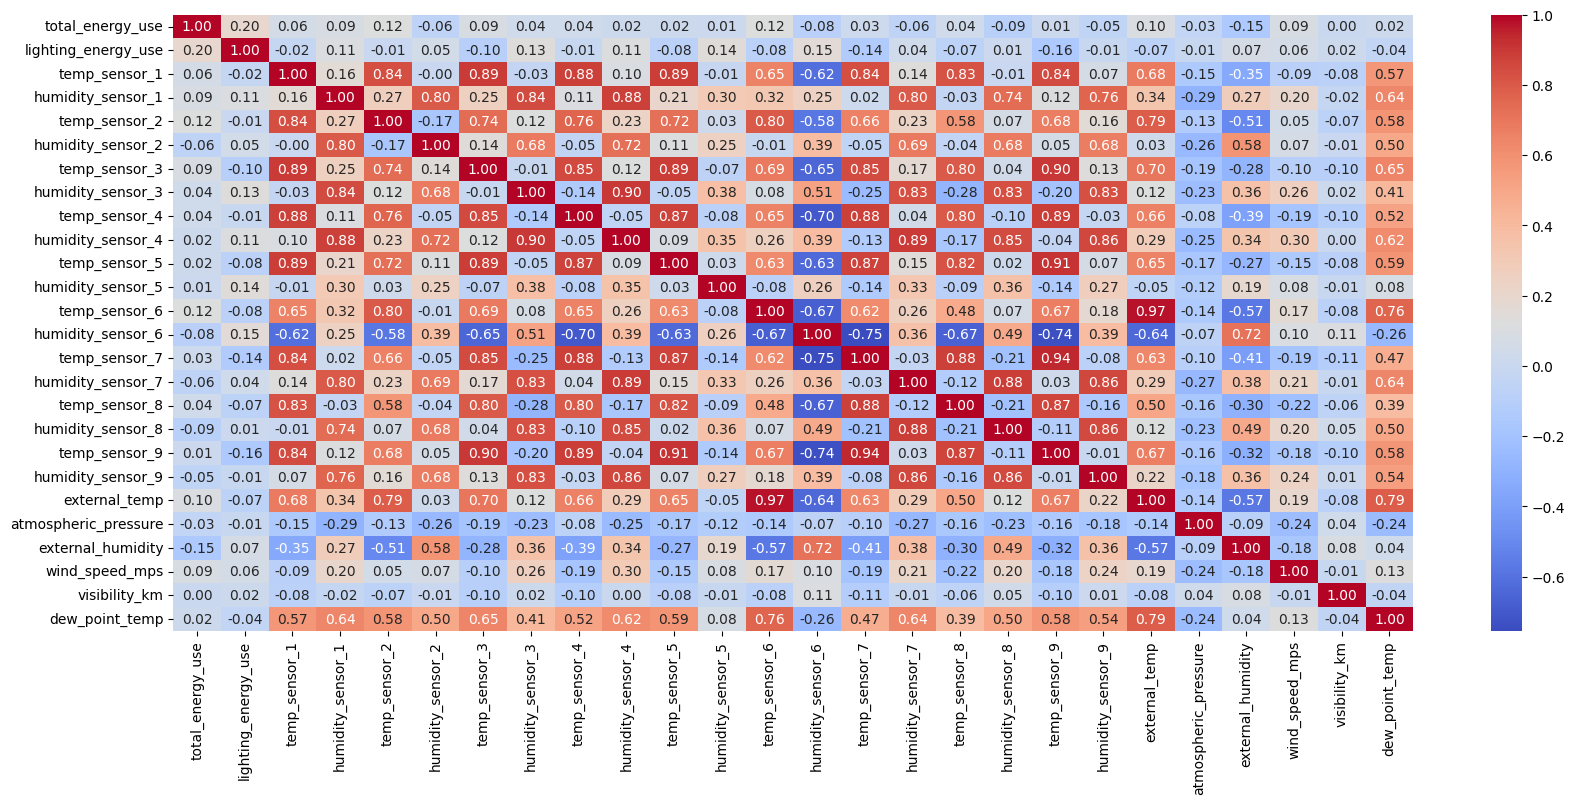

In [20]:
num_col=data.select_dtypes(include=np.number).columns
corre=data.corr(numeric_only=True)
plt.figure(figsize=(20,8))
sns.heatmap(corre,cmap='coolwarm',fmt='.2f', annot=True)
plt.show()

In [21]:
corr = data.corr()
target_corr = corr['total_energy_use'].sort_values(ascending=False)

# Show top features
print(target_corr.head(10))


total_energy_use       1.000000
lighting_energy_use    0.197278
temp_sensor_2          0.120073
temp_sensor_6          0.117638
external_temp          0.099155
wind_speed_mps         0.087122
humidity_sensor_1      0.086031
temp_sensor_3          0.085060
temp_sensor_1          0.055447
temp_sensor_4          0.040281
Name: total_energy_use, dtype: float64


In [22]:
Coloumns_to_remove_after_correlation=[
       'humidity_sensor_2',  'humidity_sensor_3', 'humidity_sensor_4', 'temp_sensor_5',
       'humidity_sensor_5', 'humidity_sensor_6',
       'temp_sensor_7', 'humidity_sensor_7', 'temp_sensor_8',
       'humidity_sensor_8', 'temp_sensor_9', 'humidity_sensor_9', 'atmospheric_pressure', 'external_humidity', 'visibility_km', 'dew_point_temp']
data.drop(columns=Coloumns_to_remove_after_correlation, inplace=True)

In [23]:
data.shape

(19735, 11)

## There no high corr with the target varible so it is non linear data

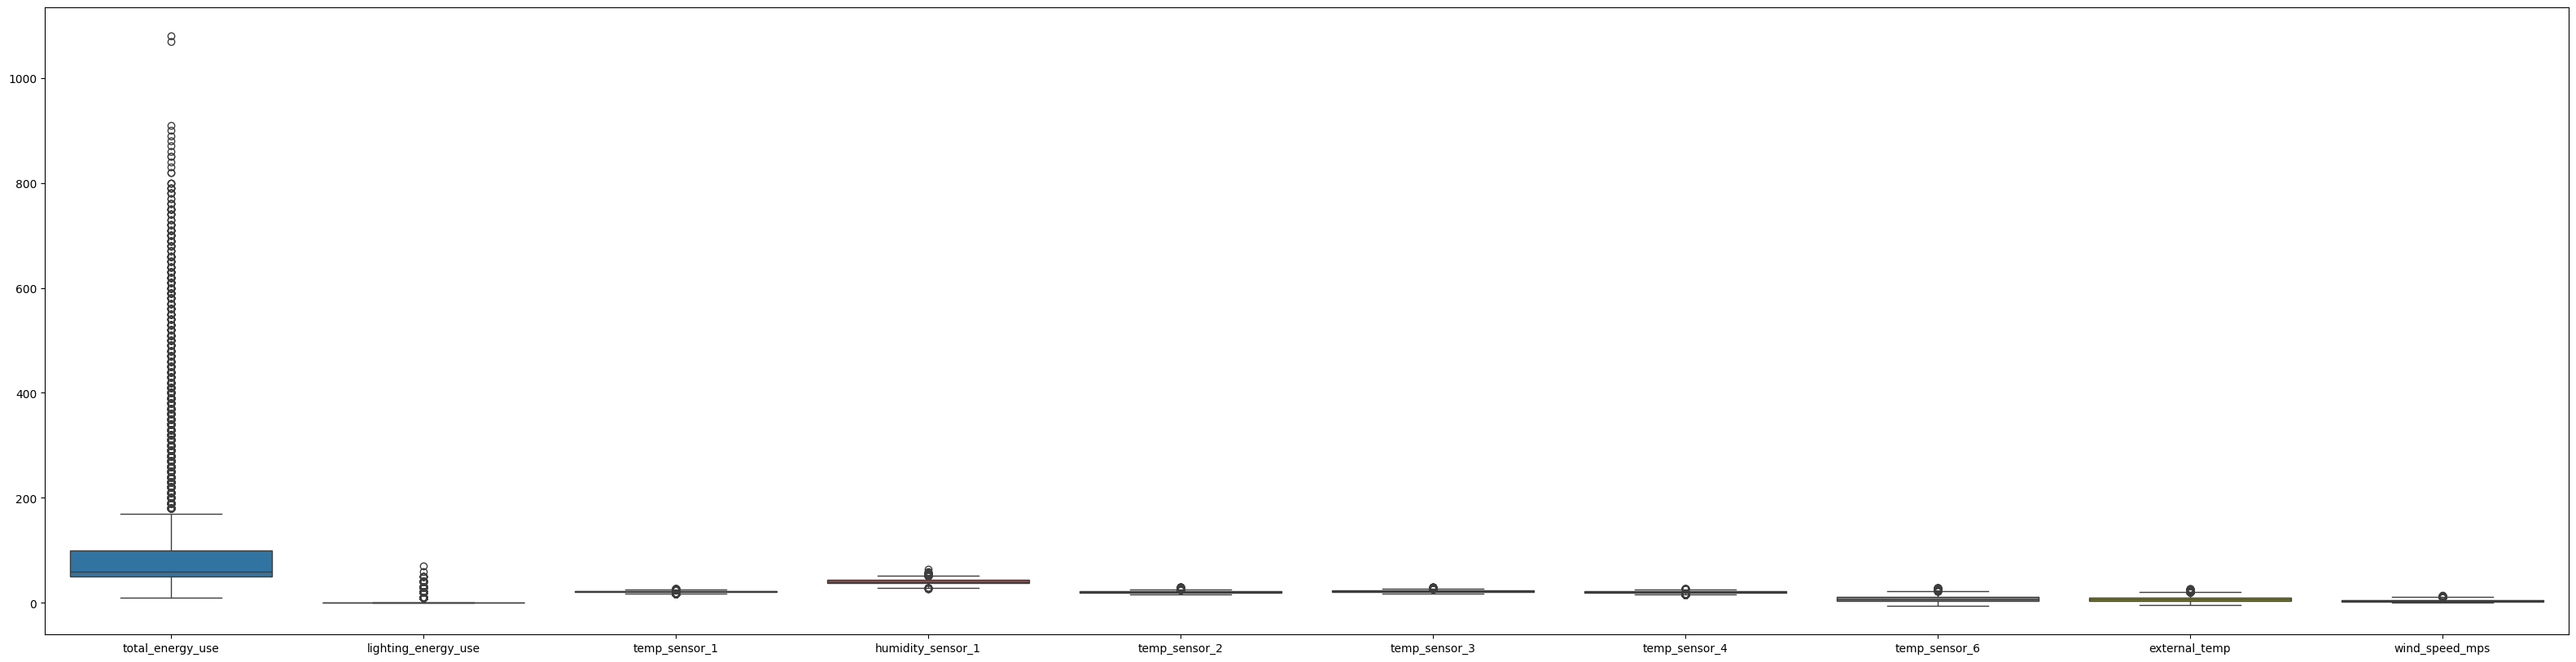

In [24]:
plt.figure(figsize=(40,10))
sns.boxplot(data)
plt.show()

## from the above boxplot there are alot of outliers
""" for non linear data we can use isolation forest to remove outliers"""


In [25]:
data['recorded_timestamp'].dt.month.unique()

array([1, 2, 3, 4, 5], dtype=int32)

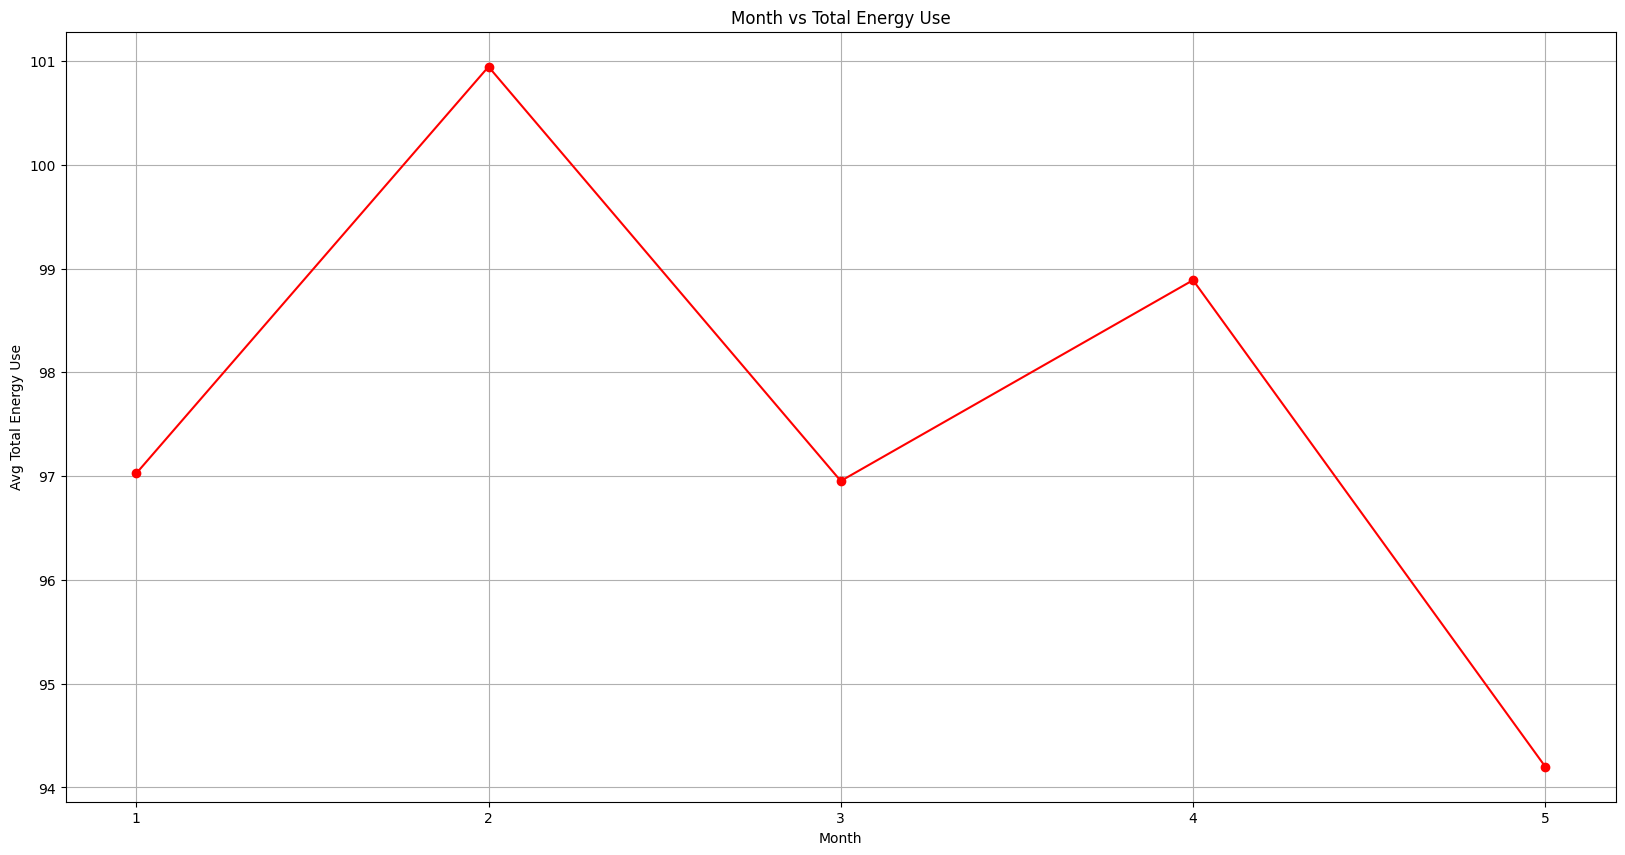

In [26]:
data['month'] = data['recorded_timestamp'].dt.month

Month_energy_use = data.groupby('month')['total_energy_use'].mean()
plt.figure(figsize=(20,10))
plt.plot(Month_energy_use.index,Month_energy_use.values,color='red',marker='o')
plt.title('Month vs Total Energy Use')
plt.xlabel('Month')
plt.ylabel('Avg Total Energy Use')
plt.xticks(Month_energy_use.index)
plt.grid()

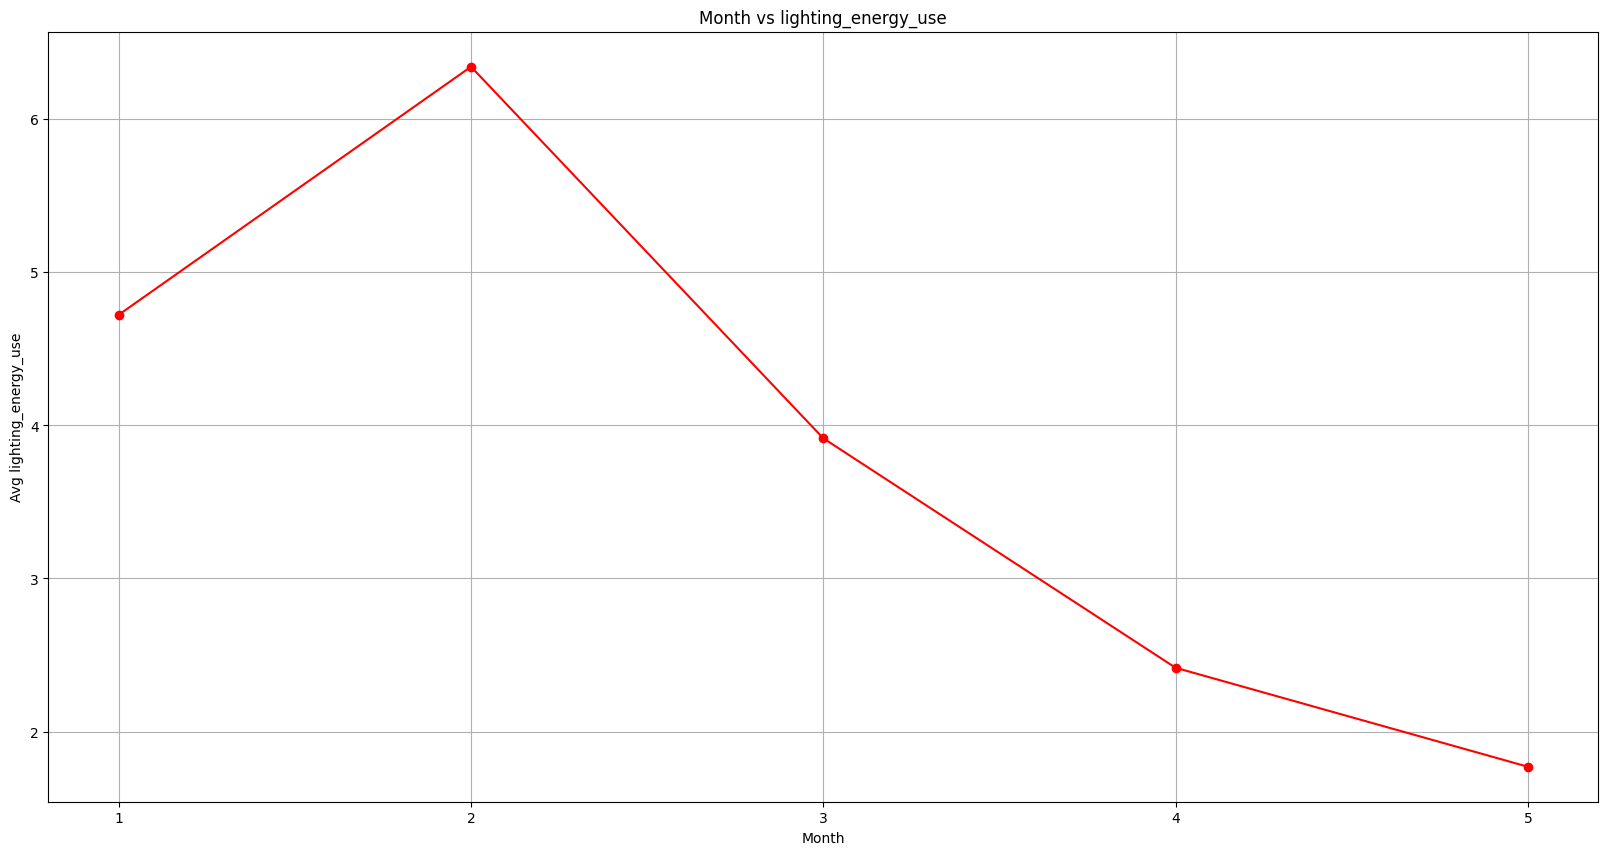

In [27]:
Month_energy_use = data.groupby('month')['lighting_energy_use'].mean()
plt.figure(figsize=(20,10))
plt.plot(Month_energy_use.index,Month_energy_use.values,color='red',marker='o')
plt.title('Month vs lighting_energy_use')
plt.xlabel('Month')
plt.ylabel('Avg lighting_energy_use')
plt.xticks(Month_energy_use.index)
plt.grid()

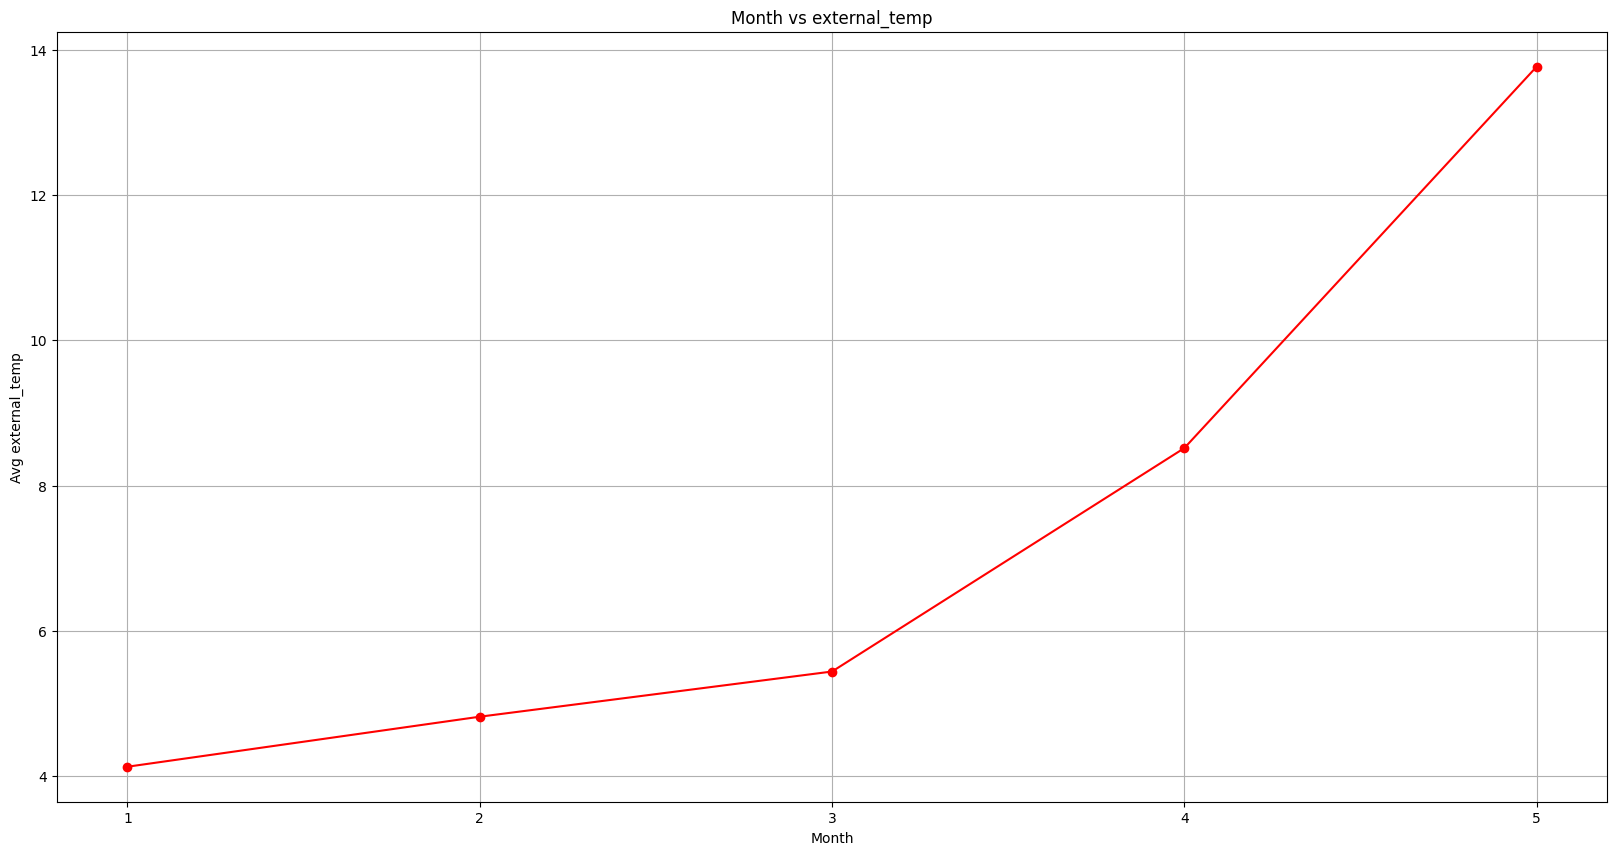

In [28]:
Month_energy_use = data.groupby('month')['external_temp'].mean()
plt.figure(figsize=(20,10))
plt.plot(Month_energy_use.index,Month_energy_use.values,color='red',marker='o')
plt.title('Month vs external_temp')
plt.xlabel('Month')
plt.ylabel('Avg external_temp')
plt.xticks(Month_energy_use.index)
plt.grid()

In [29]:
data.drop(columns=['recorded_timestamp','month'], inplace=True)

In [30]:
data.shape

(19735, 10)

## We can see the month hikes and decresing while temp increase

In [31]:
# #isolationforest for removing outliers
Isolation_Forest=IsolationForest(contamination=0.3, random_state=42)
data['outlier']=Isolation_Forest.fit_predict(data)
data_cleaned=data[data['outlier']==1].drop(columns=['outlier'])
data_cleaned.shape

(13814, 10)

## After doing 30% removal of the outliers, still there are some outliers so we use IQR which uses to remove the outlier by using quantile of 75% and 25% to the data and By substracting them we get the  IQR the we make the Lower bound and high bound with 1.5 value which make the higher sclar and scale percentage to remove the oulier when the data is above or below of the limit

In [32]:
def remove_iqr_outliers(df):
    df_out = df.copy()
    for col in df_out.select_dtypes(include=[np.number]).columns:
        Q1 = df_out[col].quantile(0.25)
        Q3 = df_out[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_out=df_out[(df_out[col] >= lower_bound) & (df_out[col] <= upper_bound)]
    return df_out

# Apply after Isolation Forest
data_cleaned = remove_iqr_outliers(data_cleaned)

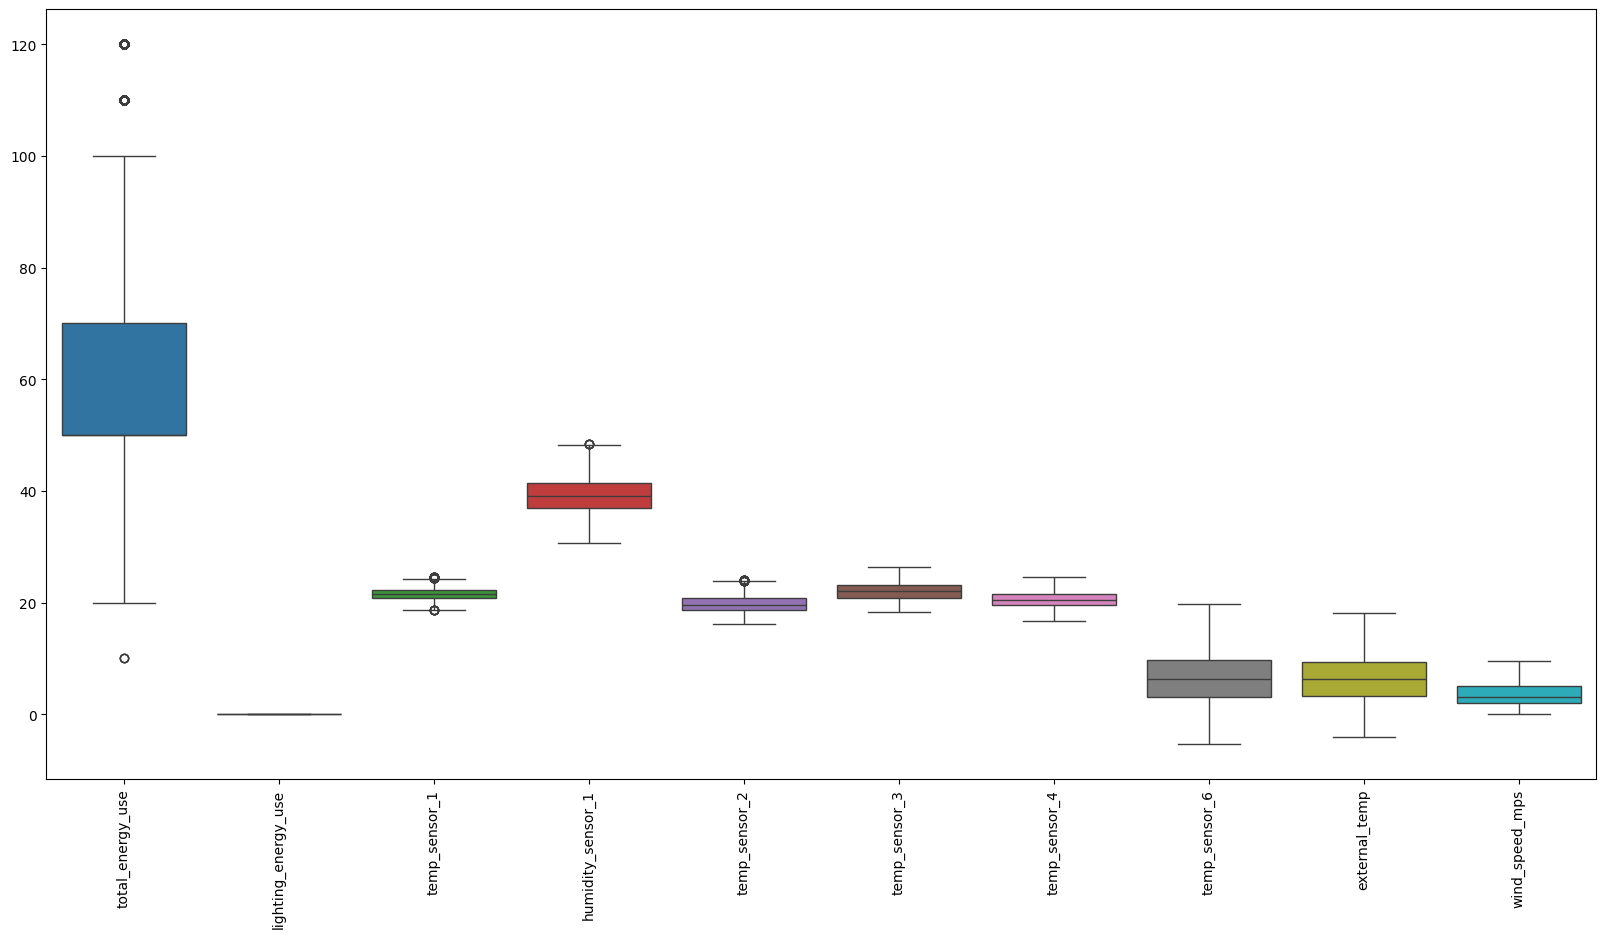

In [33]:
plt.figure(figsize=(20,10))
sns.boxplot(data_cleaned)
plt.xticks(rotation=90)
plt.show()

In [34]:
data_cleaned.shape

(10357, 10)

In [35]:
#Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned)

In [36]:
data_scaled = pd.DataFrame(data_scaled, columns=data_cleaned.columns)
data_scaled.head()

,total_energy_use,lighting_energy_use,temp_sensor_1,humidity_sensor_1,temp_sensor_2,temp_sensor_3,temp_sensor_4,temp_sensor_6,external_temp,wind_speed_mps
0,-0.462764,0.0,-0.520472,1.933737,0.331071,-1.308964,0.848953,-0.391749,-0.295984,0.829570
1,-0.928360,0.0,-0.553075,1.957473,0.291258,-1.331450,0.803899,-0.422831,-0.290972,0.752566
2,-0.462764,0.0,-0.553075,2.079245,0.271351,-1.286477,0.698023,-0.480553,-0.288466,0.675561
3,-0.928360,0.0,-0.641991,2.122588,0.271351,-1.308964,0.607916,-0.510154,-0.283455,0.598557
4,-0.462764,0.0,-0.641991,2.122588,0.204995,-1.337072,0.488523,-0.549375,-0.300995,0.521553


In [37]:
x= data_scaled.drop(columns=['total_energy_use'])
y= data_scaled['total_energy_use']

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [39]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8285, 9), (2072, 9), (8285,), (2072,))

In [40]:
model= LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("Linear Regression Model Performance:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))
# Cross-validation for Linear Regression
cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross-validated MSE:", -np.mean(cv_scores))


Linear Regression Model Performance:
Mean Absolute Error: 0.7246000752060987
Mean Squared Error: 0.9057442030285817
R-squared: 0.09433162546702556
Cross-validated MSE: 0.8929502624521428


In [41]:
model_rf= RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(x_train, y_train)
y_pred_rf = model_rf.predict(x_test)
print("Random Forest Model Performance:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_rf))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("R-squared:", r2_score(y_test, y_pred_rf))
# Cross-validation for Random Forest
cv_scores_rf = cross_val_score(model_rf, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross-validated MSE for Random Forest:", -np.mean(cv_scores_rf))

Random Forest Model Performance:
Mean Absolute Error: 0.42566017712296145
Mean Squared Error: 0.3325177527183799
R-squared: 0.6675100855176994
Cross-validated MSE for Random Forest: 0.3762314898566887


In [42]:
model_dt= DecisionTreeRegressor(random_state=42)
model_dt.fit(x_train, y_train)
y_pred_dt = model_dt.predict(x_test)
print("Decision Tree Model Performance:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_dt))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_dt))
print("R-squared:", r2_score(y_test, y_pred_dt))
# Cross-validation for Decision Tree
cv_scores_dt = cross_val_score(model_dt, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross-validated MSE for Decision Tree:", -np.mean(cv_scores_dt))


Decision Tree Model Performance:
Mean Absolute Error: 0.5280650236538458
Mean Squared Error: 0.6094836210206739
R-squared: 0.3905674046728108
Cross-validated MSE for Decision Tree: 0.7087531386417835


In [43]:
model_gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
model_gb.fit(x_train, y_train)
y_pred_gb = model_gb.predict(x_test)
print("Gradient Boosting Model Performance:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_gb))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_gb))
print("R-squared:", r2_score(y_test, y_pred_gb))
# Cross-validation for Gradient Boosting
cv_scores_gb = cross_val_score(model_gb, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross-validated MSE for Gradient Boosting:", -np.mean(cv_scores_gb))


Gradient Boosting Model Performance:
Mean Absolute Error: 0.6355838001096322
Mean Squared Error: 0.7121651366330188
R-squared: 0.28789448551057795
Cross-validated MSE for Gradient Boosting: 0.7280520201265104


## Based on the results random forest regressor performance well
## with low mse and high r2 scores

# So on the model we need to do the hyperparameter tuning using gridsearchcv


In [44]:
hyperparameters = {
    'n_estimators': [100],
    'max_depth': [10,15],
    'min_samples_split': [10,15, 20],
    'min_samples_leaf': [1, 2, 4]
    }
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=model_rf, param_grid=hyperparameters, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(x_test)
print("Best Random Forest Model Performance:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_best))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_best))
print("R-squared:", r2_score(y_test, y_pred_best))
# Cross-validation for Best Random Forest
cv_scores_best_rf = cross_val_score(best_model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross-validated MSE for Best Random Forest:", -np.mean(cv_scores_best_rf))


Best Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best Random Forest Model Performance:
Mean Absolute Error: 0.4557229326910484
Mean Squared Error: 0.37652046488902674
R-squared: 0.6235110572342422
Cross-validated MSE for Best Random Forest: 0.42015585640533193


## I have preformed with tuning alot times with different parameter but still not getting good result comparared to before tuning

# *** Comparing results with before tuning, i need to stick with before tuning appiled model RandomForestRegressor for good outcome of prediction***